In [2]:
import pandas as pd
import numpy as np
ruta='/content/drive/MyDrive/Colab Notebooks/'

data=pd.read_csv(ruta+'temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT
                                                         #         http://astro.iam.udg.mx/Estacion/NOAAMO.TXT
data.columns=['Temperatura máxima','Temperatura mínima','HDD','CDD','Rain']
d=['Sábado','Domingo','Lunes','Martes','Miércoles','Jueves','Viernes']
dias=[d[i%7] for i in range(len(data))]
catego=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
prono=[catego[-1] if data['Rain'][i]>0 else catego[int(round(1.2*(data['HDD'][i]-data['CDD'][i])+2))] for i in range(len(data))]
df=pd.DataFrame(columns=['Días','Pronóstico','Temperatura máxima','Temperatura mínima'],index=range(len(data)))
df.iloc[:,2:4]=data.iloc[:,0:2]
df['Días']=dias
df['Pronóstico']=prono
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima
0,Sábado,Parcialmente nublado,28.2,11.2
1,Domingo,Parcialmente nublado,29.1,10.7
2,Lunes,Mayormente nublado,26.1,10.4
3,Martes,Mayormente soleado,29.4,11.1
4,Miércoles,Mayormente soleado,29.8,11.1


# Codificación usando Contraste polinómico

In [ ]:
#@title Polinomio lineal
# Ordenamos las categorías
df['Días'].unique()

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [3]:
dias_ordenado=['Domingo','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado']
n=df['Días'].nunique() # Cardinalidad
lim=n-1 if n%2==0 else (n-1)//2 # Limite
step=2 if n%2==0 else 1 # Paso
X=range(-lim,lim+1,step)
list(X)

[-3, -2, -1, 0, 1, 2, 3]

In [ ]:
a0=0 # Condición para que las categorías codificadas sumen cero
a1=1 # Secuencia incremental
Y=[a0+a1*x for x in X]
Y

[-3, -2, -1, 0, 1, 2, 3]

In [ ]:
dias_cod={categoria:y for categoria,y in zip(dias_ordenado,Y)}
dias_cod

{'Domingo': -3,
 'Lunes': -2,
 'Martes': -1,
 'Miércoles': 0,
 'Jueves': 1,
 'Viernes': 2,
 'Sábado': 3}

In [ ]:
df['Días_cod']=df['Días'].map(dias_cod)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_cod
0,Sábado,Parcialmente nublado,28.2,11.2,3
1,Domingo,Parcialmente nublado,29.1,10.7,-3
2,Lunes,Mayormente nublado,26.1,10.4,-2
3,Martes,Mayormente soleado,29.4,11.1,-1
4,Miércoles,Mayormente soleado,29.8,11.1,0


In [ ]:
# Creamos una función para automatizar la codificación lineal
def codificacion_lineal(var_ordenada,a1=1):
  n=len(var_ordenada)
  lim=n-1 if n%2==0 else (n-1)//2
  step=2 if n%2==0 else 1
  X=range(-lim,lim+1,step)
  a0=0
  Y=[a0+a1*x for x in X]
  return {categoria:y for categoria,y in zip(var_ordenada,Y)}

In [ ]:
# Codificación de 'Pronóstico'
df['Pronóstico'].unique()

array(['Parcialmente nublado', 'Mayormente nublado', 'Mayormente soleado',
       'Soleado', 'Lluvioso', 'Nublado'], dtype=object)

In [ ]:
pronostico_ordenado=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
pronostico_cod=codificacion_lineal(pronostico_ordenado)
pronostico_cod

{'Soleado': -5,
 'Mayormente soleado': -3,
 'Parcialmente nublado': -1,
 'Mayormente nublado': 1,
 'Nublado': 3,
 'Lluvioso': 5}

In [ ]:
df['Pronóstico_lin']=df['Pronóstico'].map(pronostico_cod)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_cod,Pronóstico_lin
0,Sábado,Parcialmente nublado,28.2,11.2,3,-1
1,Domingo,Parcialmente nublado,29.1,10.7,-3,-1
2,Lunes,Mayormente nublado,26.1,10.4,-2,1
3,Martes,Mayormente soleado,29.4,11.1,-1,-3
4,Miércoles,Mayormente soleado,29.8,11.1,0,-3


# Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresion_lin=LinearRegression()
regresion_lin.fit(df[['Días_cod','Pronóstico_lin']],df['Temperatura máxima'])
regresion_lin.score(df[['Días_cod','Pronóstico_lin']],df['Temperatura máxima'])

0.27741155022224107

In [ ]:
import matplotlib.pyplot as plt

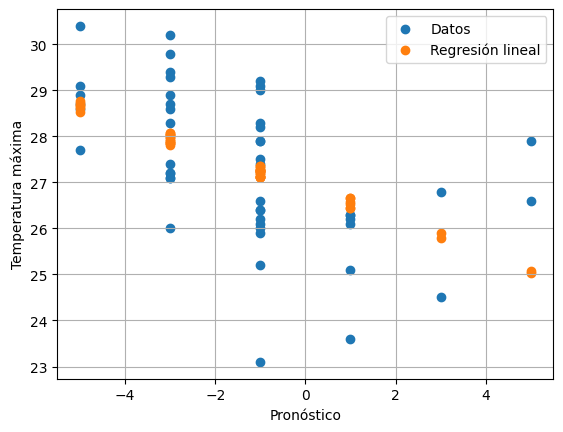

In [ ]:
plt.scatter(df['Pronóstico_lin'],df['Temperatura máxima'],label='Datos')
plt.scatter(df['Pronóstico_lin'],regresion_lin.predict(df[['Días_cod','Pronóstico_lin']]),label='Regresión lineal')
plt.legend()
plt.xlabel('Pronóstico')
plt.ylabel('Temperatura máxima')
plt.grid()

In [ ]:
#@title Codificación cuadrática
pronostico_ordenado

['Soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Mayormente nublado',
 'Nublado',
 'Lluvioso']

In [ ]:
n=len(pronostico_ordenado)
lim=n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1
X=range(-lim,lim+1,step)
list(X)

[-5, -3, -1, 1, 3, 5]

In [ ]:
a2=1 # Parábola cóncava positiva
a1=0
a0=-a2*np.sum([x**2 for x in X])/n # Condición para que la codificación sume cero
Y=[a0+a1*x+a2*x**2 for x in X]
Y

[13.333333333333334,
 -2.666666666666666,
 -10.666666666666666,
 -10.666666666666666,
 -2.666666666666666,
 13.333333333333334]

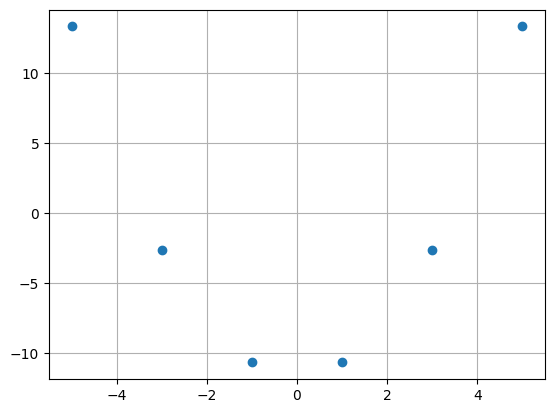

In [ ]:
plt.scatter(X,Y)
plt.grid()

In [ ]:
a2=1 # Parábola cóncava positiva
a1=10
a0=-a2*np.sum([x**2 for x in X])/n # Condición para que la codificación sume cero
Y=[a0+a1*x+a2*x**2 for x in X]
Y

[-36.666666666666664,
 -32.666666666666664,
 -20.666666666666664,
 -0.6666666666666661,
 27.333333333333336,
 63.333333333333336]

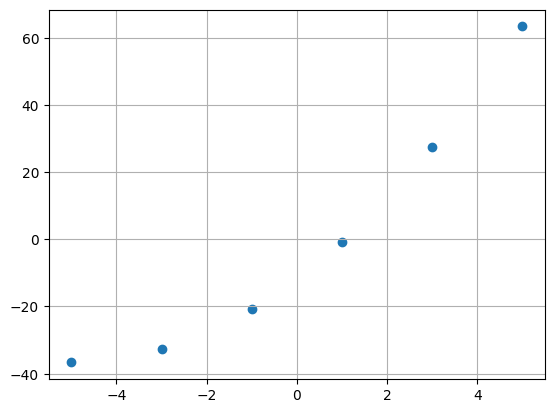

In [ ]:
plt.scatter(X,Y) # Codificación creciente
plt.grid()

In [ ]:
a2=1 # Parábola cóncava positiva
a1=0.1
a0=-a2*np.sum([x**2 for x in X])/n # Condición para que la codificación sume cero
Y=[a0+a1*x+a2*x**2 for x in X]
Y

[12.833333333333334,
 -2.966666666666667,
 -10.766666666666666,
 -10.566666666666666,
 -2.3666666666666654,
 13.833333333333334]

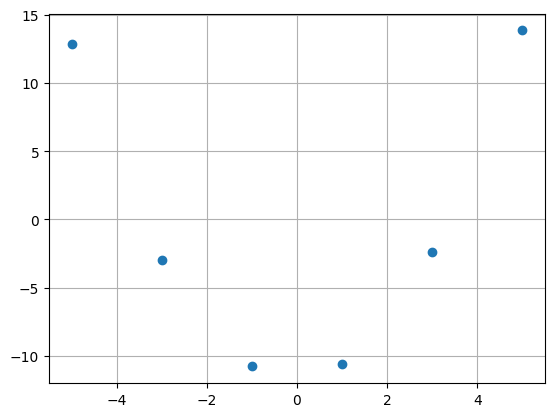

In [ ]:
plt.scatter(X,Y) # Categoríascodificadas con valores diferentes
plt.grid()

# Regresión lineal

In [ ]:
df['Pronóstico_cuad']=df['Pronóstico'].map({categoria:y for categoria,y in zip(pronostico_ordenado,Y)})
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_cod,Pronóstico_lin,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,3,-1,-10.766667
1,Domingo,Parcialmente nublado,29.1,10.7,-3,-1,-10.766667
2,Lunes,Mayormente nublado,26.1,10.4,-2,1,-10.566667
3,Martes,Mayormente soleado,29.4,11.1,-1,-3,-2.966667
4,Miércoles,Mayormente soleado,29.8,11.1,0,-3,-2.966667


In [ ]:
regresion_cuad=LinearRegression()
regresion_cuad.fit(df[['Días_cod','Pronóstico_lin','Pronóstico_cuad']],df['Temperatura máxima'])
regresion_cuad.score(df[['Días_cod','Pronóstico_lin','Pronóstico_cuad']],df['Temperatura máxima'])

0.34800116567027684

In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.10.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

 1. This LICENSE AGREEMENT is between the Matplotlib Development Team
 ("MDT"), and the Individual or Organization ("Licensee") accessing and
 otherwise using matplotlib software in source or binary form and its
 associated documentation.

 2. Subject to the terms and conditions of this License Agreement, MDT
 hereby grants Licensee a nonexclusive, royalty-free, world-wide license
 to reproduce, analyze, test, perform and/or display publicly, prepare
 derivative works, distribute, and otherwise use matplotlib
 alone or in any derivative version, provided, however, that MDT's
 License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
 2012- Matplotlib Development Team; All Rights Reserved" are retained in
 matplotlib

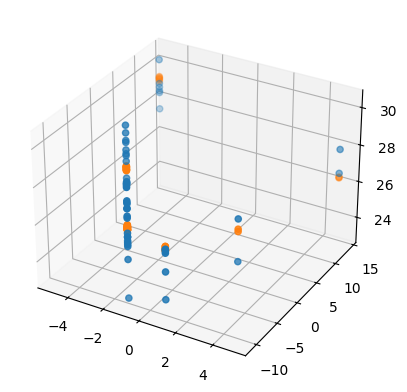

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(df['Pronóstico_lin'].values,df['Pronóstico_cuad'].values,df['Temperatura máxima'].astype('float'))
ax.scatter(df['Pronóstico_lin'].values,df['Pronóstico_cuad'].values,regresion_cuad.predict(df[['Días_cod','Pronóstico_lin','Pronóstico_cuad']]),label='Regresión cuadrática')

plt.grid()